In [2]:
import ROOT
import numpy as np
import pylab as plt
from array import array
import pandas as pd
from sqlalchemy import *

%matplotlib inline

Welcome to JupyROOT 6.08/00


In [3]:
ROOT.gROOT.ProcessLine(
"struct tbjcStruct\
{\
    short uval[512];\
};" )

0L

In [10]:
f = ROOT.TFile("../data/ANL_March_2013/ROOT_files/run40.root")
tree = f.Get("AutoTree")
tb0 = tree.GetBranch("asic_1_33")
#tb1 = tree.GetBranch("PSA")
#tb2 = tree.GetBranch("Hit")
#l = ROOT.vector('short')()
tbjcStruct = ROOT.tbjcStruct()
tb0.SetAddress(ROOT.AddressOf(tbjcStruct,'uval'))


In [6]:
engineMap = create_engine('sqlite+pysqlite:///../data/SQL/Tin132/map.sql')
LookMapdf = pd.io.sql.read_sql("SELECT * FROM LookMap", engineMap)

def FindPadNum(AgetID,ChannelID):
    print LookMapdf[(LookMapdf['AgetID']==AgetID)&(LookMapdf['ChannelID']==ChannelID)]['PadNum']
    try:
    return LookMapdf[(LookMapdf['AgetID']==AgetID)&(LookMapdf['ChannelID']==ChannelID)]['PadNum'].values[0]

In [7]:
#LookMapdf.head()
#sorted(LookMapdf['ChannelID'].unique())
#sorted(LookMapdf['AgetID'].unique());
#print sorted(LookMapdf[LookMapdf['AgetID']==0]['PadNum'].unique())
#LookMapdf

In [31]:
LookMapdf.to_csv("map.csv")

[209, 262, 266, 265, 264, 266, 263, 263, 262, 263]


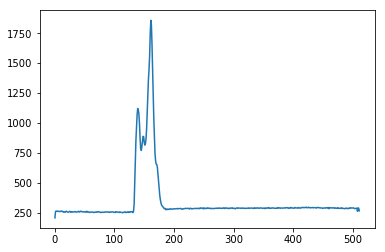

In [29]:
tb0.GetEntry(1)
plt.plot([tbjcStruct.uval[_] for _ in range(512)])
print [tbjcStruct.uval[_] for _ in range(512)][:10]

In [9]:
from sqlalchemy import *

engine = create_engine('sqlite+pysqlite:///../a.sql')

# In[ ]:

import model
from sqlalchemy import orm

# In[ ]:

model.metadata.bind = engine
model.metadata.create_all()

# Set up the session
sm = orm.sessionmaker(bind=engine, autoflush=True, autocommit=False,
    expire_on_commit=True)
session = orm.scoped_session(sm)

In [9]:
# In[ ]:

TB = 512
for i in xrange(10):

    if i % 100 == 0:
        print i

    tb0.GetEntry(i)
    RawADC = model.RawADC()
    #RawADC.ID = i
    RawADC.EventID = i
    RawADC.PadNum = 40

    for j in range(TB):
        setattr(RawADC, 't'+str(j), tbjcStruct.uval[j])
    session.add(RawADC)

    #session.flush()
    if i %10000 == 0:
        session.commit()
session.commit()

0


12


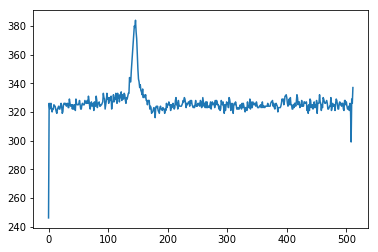

In [16]:
for i in range(2,1900):
    tree.GetEntry(i)
    data = [tbjcStruct1.uval[_] for _ in range(512)]
    
    if sum(data)>10:
        print i
        plt.plot([tbjcStruct1.uval[_] for _ in range(512)])
        break

In [5]:
names = [br.GetName() for br in tree.GetListOfBranches()]
titles = [br.GetTitle() for br in tree.GetListOfBranches()]

In [7]:
for n,t in zip(names,titles):
    print n,':',t

metaType : metaType/i
frameSize : frameSize/i
dataSource : dataSource/i
frameType : frameType/i
revision : revision/i
headerSize : headerSize/i
itemSize : itemSize/i
nItems : nItems/i
eventTime : eventTime/l
eventIdx : eventIdx/i
coboIdx : coboIdx/i
asadIdx : asadIdx/i
readOffset : readOffset/i
status : status/i
hitPat_0 : hitPat_0[3]/i
hitPat_1 : hitPat_1[3]/i
hitPat_2 : hitPat_2[3]/i
hitPat_3 : hitPat_3[3]/i
multip_0 : multip_0/i
multip_1 : multip_1/i
multip_2 : multip_2/i
multip_3 : multip_3/i
multip_3 : multip_3/i
windowOut : windowOut/i
lastCell_0 : lastCell_0/i
lastCell_1 : lastCell_1/i
lastCell_2 : lastCell_2/i
lastCell_3 : lastCell_3/i
event_no : event_no/i
time_stamp : time_stamp/l
cobo_tac : cobo_tac/s
mcp_tac : mcp_tac/s
asic_0_00 : uval[512]/s
asic_0_01 : uval[512]/s
asic_0_02 : uval[512]/s
asic_0_03 : uval[512]/s
asic_0_04 : uval[512]/s
asic_0_05 : uval[512]/s
asic_0_06 : uval[512]/s
asic_0_07 : uval[512]/s
asic_0_08 : uval[512]/s
asic_0_09 : uval[512]/s
asic_0_10 : uval[5